In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')



In [5]:
# load the medical_clean.csv dataset
df = pd.read_csv('medical_clean.csv')

#  basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()


Dataset shape: (10000, 50)

First 5 rows:


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:

# column types and missing values
print("Data types and missing values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
df_info

Data types and missing values:


,Data Type,Non-Null Count,Missing Values,Missing Percentage
CaseOrder,int64,10000,0,0.0
Customer_id,object,10000,0,0.0
Interaction,object,10000,0,0.0
UID,object,10000,0,0.0
City,object,10000,0,0.0
State,object,10000,0,0.0
County,object,10000,0,0.0
Zip,int64,10000,0,0.0
Lat,float64,10000,0,0.0
Lng,float64,10000,0,0.0


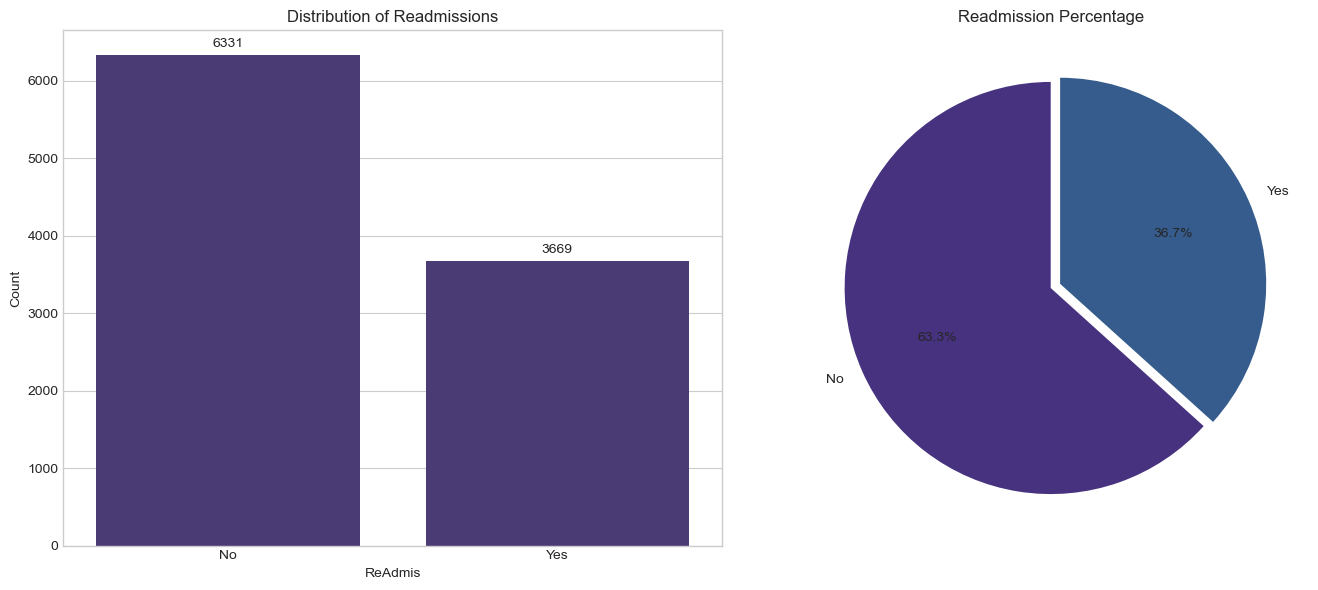


Readmission counts:
ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

Readmission percentages:
ReAdmis
No     63.31
Yes    36.69
Name: proportion, dtype: float64%


In [7]:


#distribution of readmissions
readmission_counts = df['ReAdmis'].value_counts()
readmission_percentage = df['ReAdmis'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# count plot
sns.countplot(x='ReAdmis', data=df, ax=ax[0])
ax[0].set_title('Distribution of Readmissions')
ax[0].set_ylabel('Count')
for i, count in enumerate(readmission_counts):
    ax[0].annotate(f"{count}", xy=(i, count + 100), ha='center')

#pie chart
ax[1].pie(readmission_percentage, labels=readmission_percentage.index, 
          autopct='%1.1f%%', startangle=90, explode=[0, 0.05])
ax[1].set_title('Readmission Percentage')

plt.tight_layout()
plt.show()

print(f"\nReadmission counts:\n{readmission_counts}")
print(f"\nReadmission percentages:\n{readmission_percentage.round(2)}%")

In [8]:


#selectiing potential continuous variables for clustering
continuous_vars = ['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 
                   'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# summary statistics for continuous variables
print("Summary statistics for continuous variables:")
df[continuous_vars].describe().round(2)

Summary statistics for continuous variables:


,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,53.51,40490.50,17.96,5.01,1.00,0.40,34.46,5312.17,12934.53
std,20.64,28521.15,2.02,1.05,1.01,0.63,26.31,2180.39,6542.60
min,18.00,154.08,9.81,1.00,0.00,0.00,1.00,1938.31,3125.70
25%,36.00,19598.78,16.63,4.00,0.00,0.00,7.90,3179.37,7986.49
50%,53.00,33768.42,17.95,5.00,1.00,0.00,35.84,5213.95,11573.98
75%,71.00,54296.40,19.35,6.00,2.00,1.00,61.16,7459.70,15626.49
max,89.00,207249.10,26.39,9.00,7.00,5.00,71.98,9180.73,30566.07


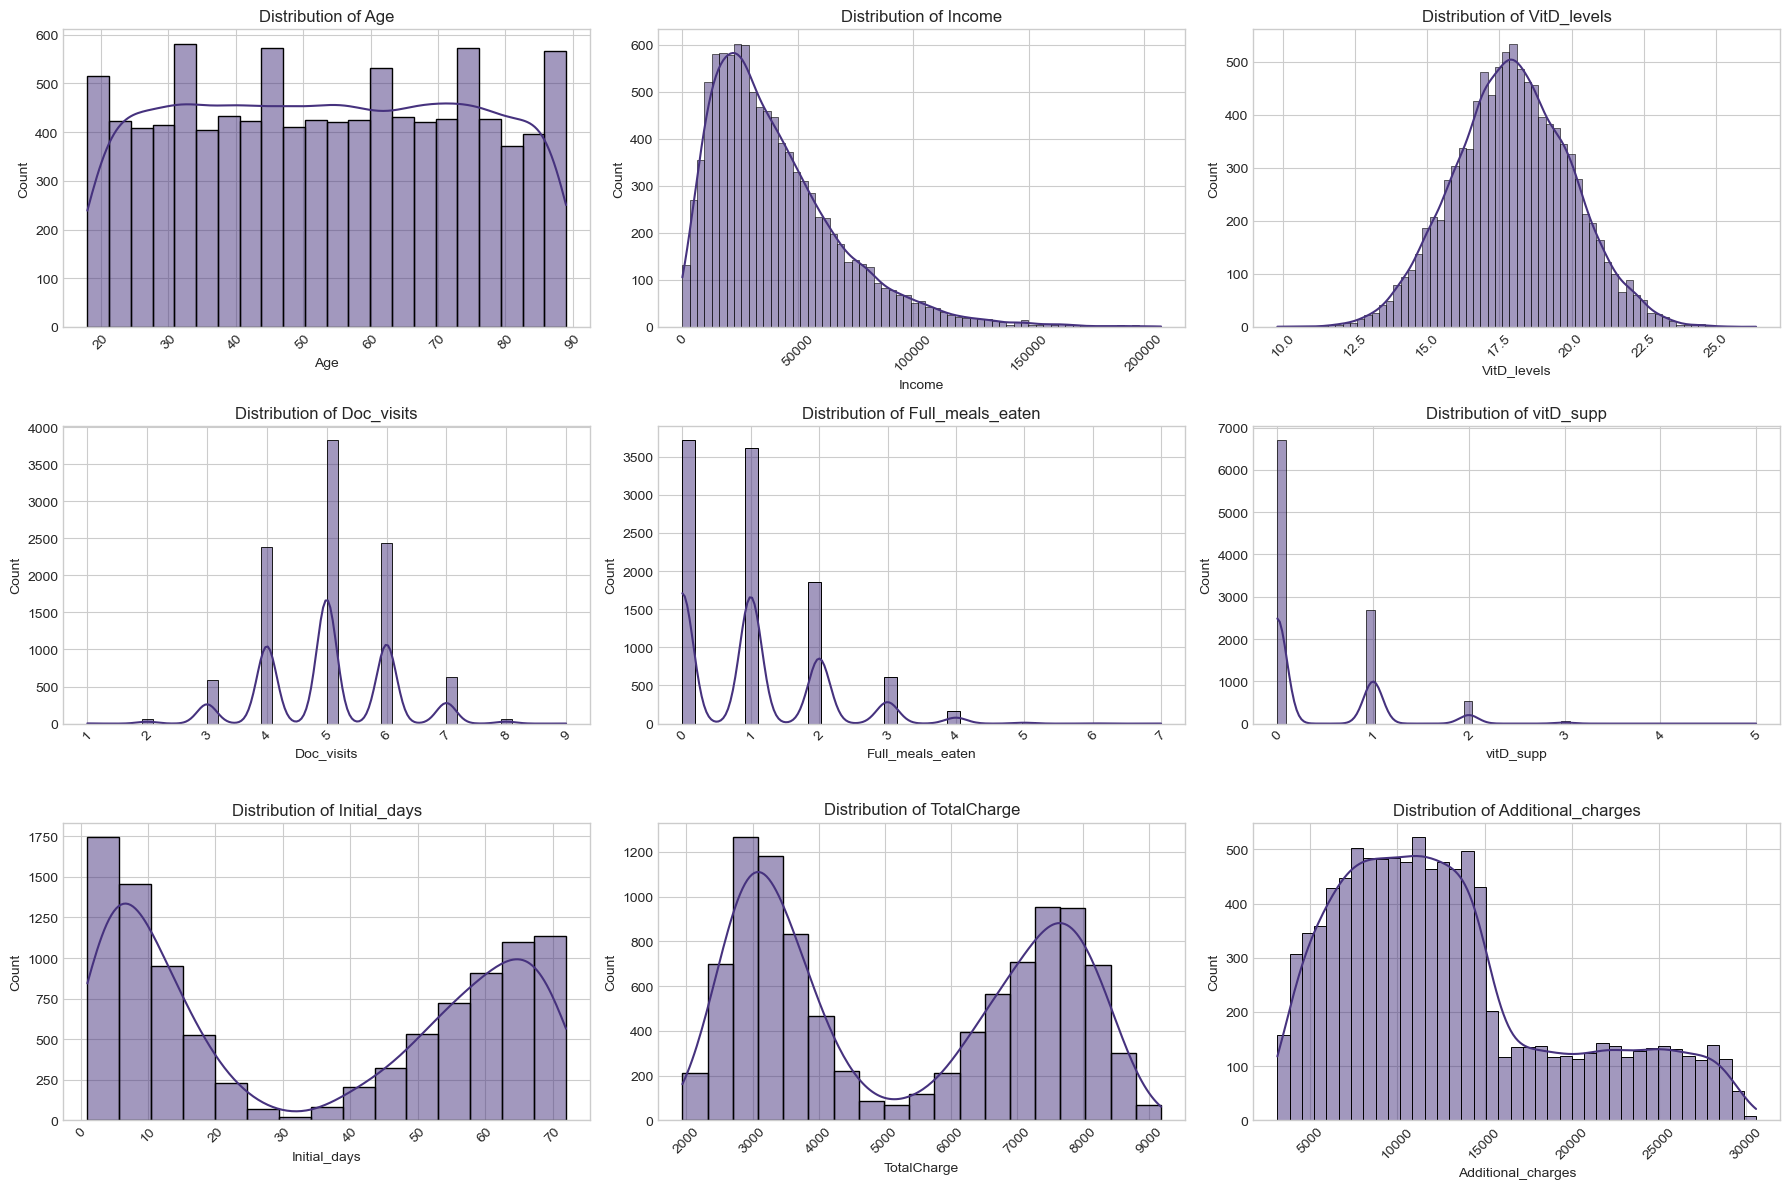

In [9]:
# setting up histograms for each continuous variable
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

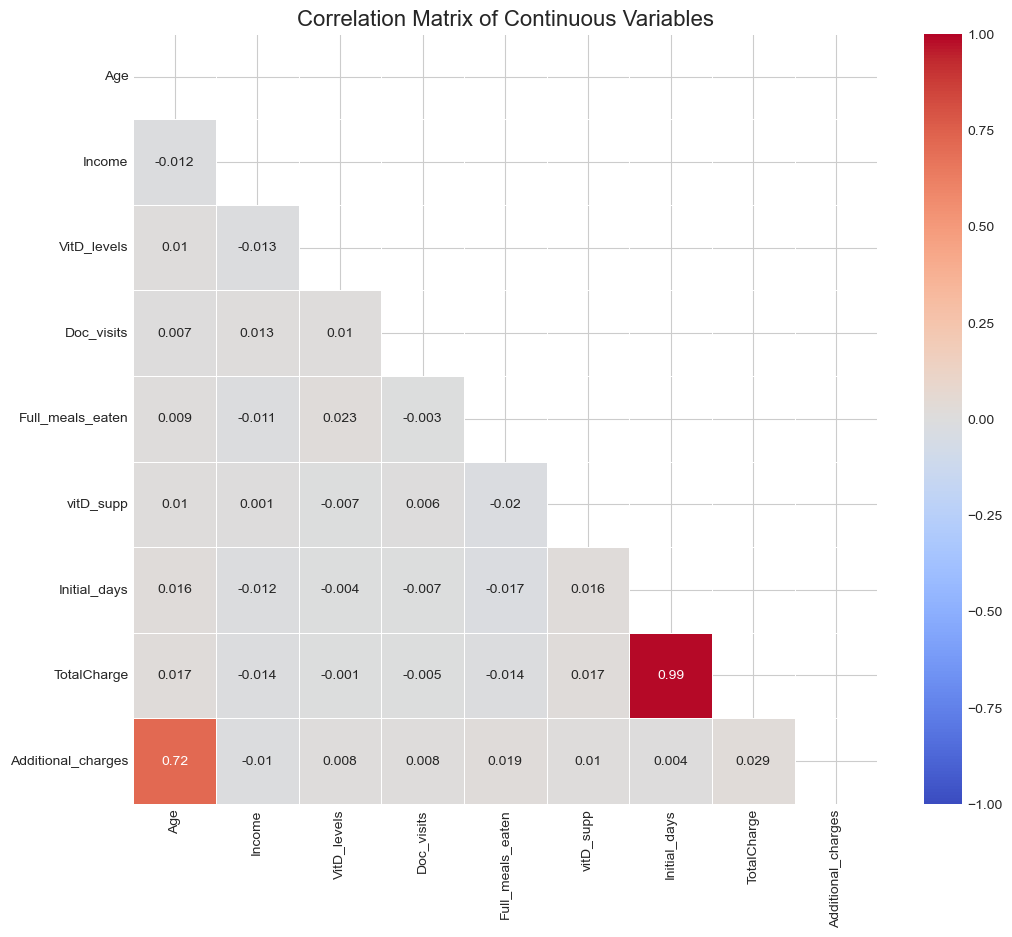

Top 5 strongest variable correlations:
Initial_days and TotalCharge: 0.988
Age and Additional_charges: 0.717
TotalCharge and Additional_charges: 0.029
VitD_levels and Full_meals_eaten: 0.023
Full_meals_eaten and vitD_supp: 0.020


In [10]:


# correlation matrix
corr_matrix = df[continuous_vars].corr().round(3)

#heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Variables', fontsize=16)
plt.show()

#strongest correlations
print("Top 5 strongest variable correlations:")
corr_pairs = []
for i, var1 in enumerate(continuous_vars):
    for j, var2 in enumerate(continuous_vars):
        if i < j:  # Only use upper triangle
            corr_pairs.append((var1, var2, abs(corr_matrix.loc[var1, var2])))

# Sorting by absolute correlation
corr_pairs.sort(key=lambda x: x[2], reverse=True)
for var1, var2, corr in corr_pairs[:5]:
    print(f"{var1} and {var2}: {corr:.3f}")

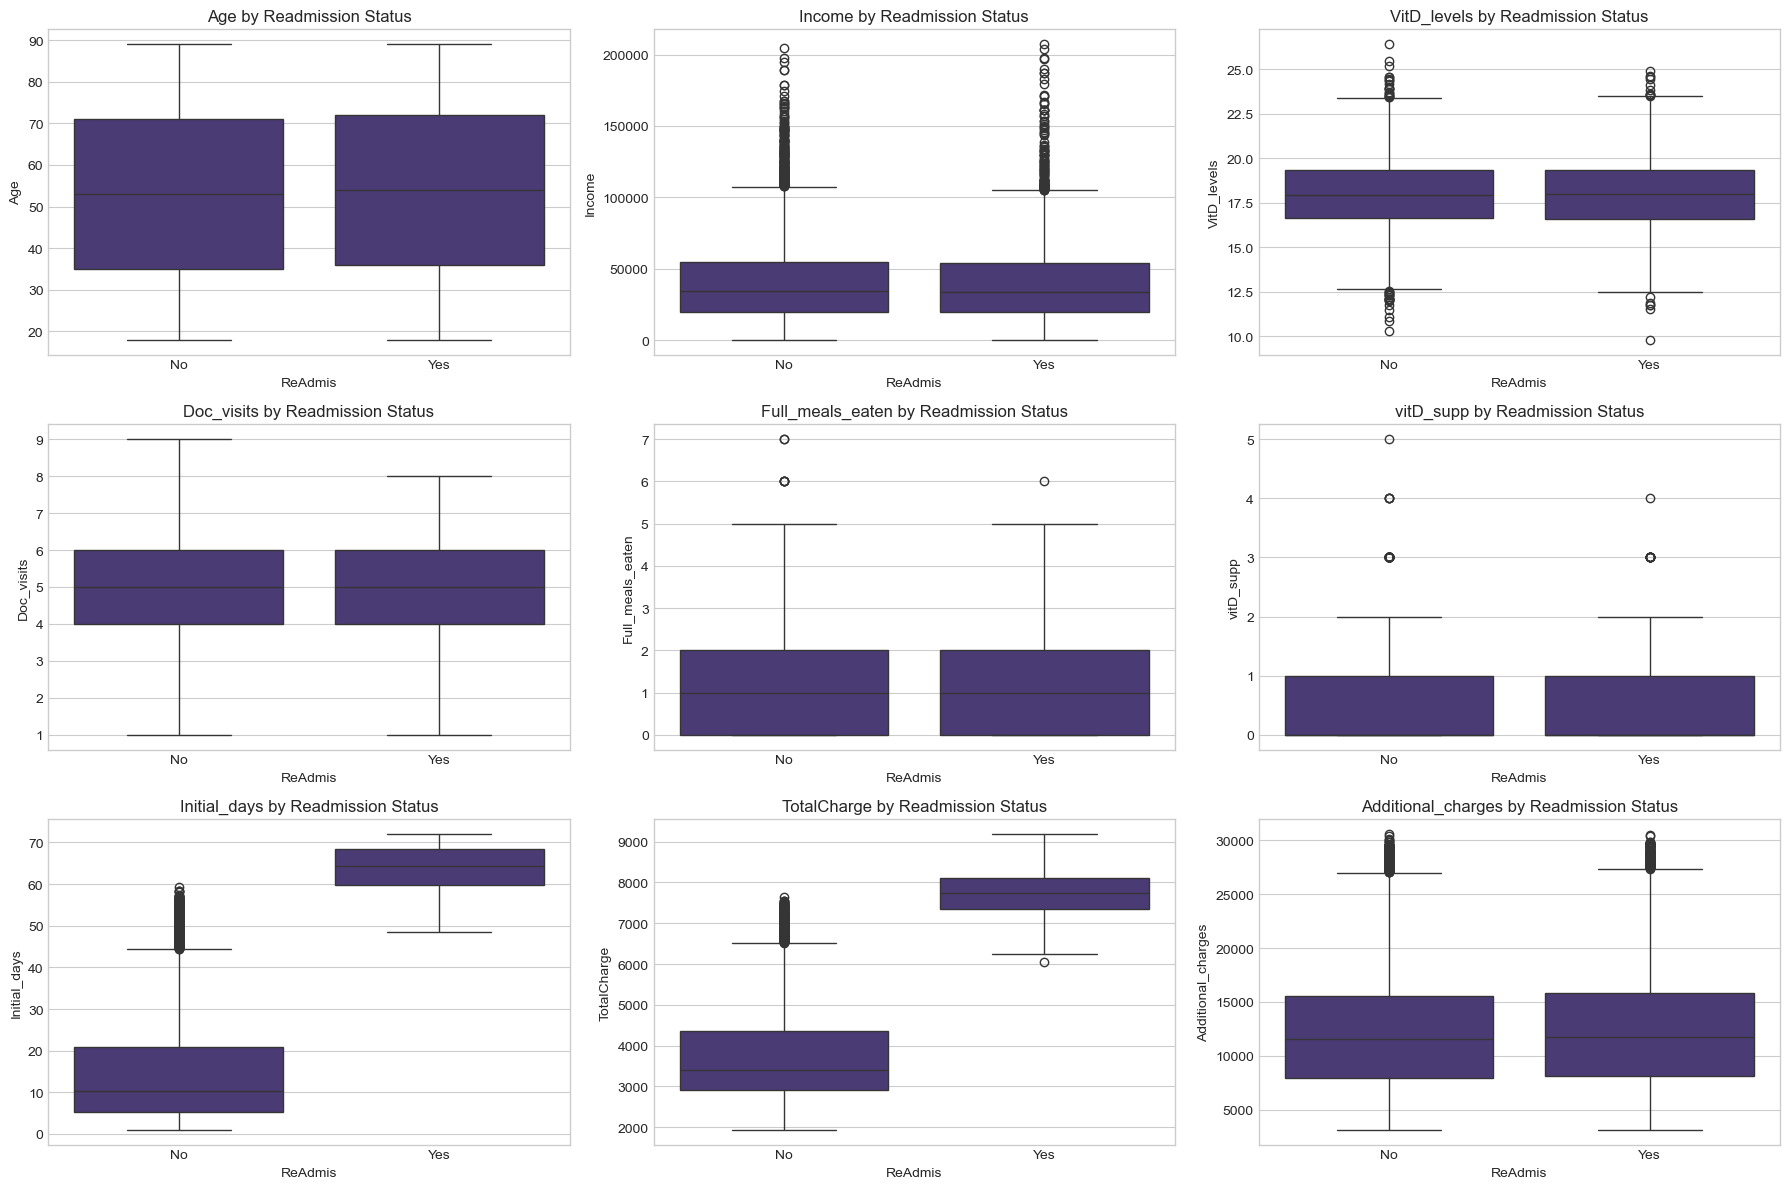

Mean values by readmission status:


,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
ReAdmis,,,,,,,,,
No,53.26,40740.26,17.96,5.01,1.01,0.39,17.41,3911.77,12866.70
Yes,53.94,40059.52,17.98,5.01,0.99,0.41,63.86,7728.62,13051.58


In [11]:
#comparing the distribution of continuous variables by readmission statuss
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.boxplot(x='ReAdmis', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} by Readmission Status')


plt.tight_layout()
plt.show()


# mean values for readmitted vs not readmitted
readmission_means = df.groupby('ReAdmis')[continuous_vars].mean().round(2)
print("Mean values by readmission status:")
readmission_means



In [12]:
#looking fro missing values in the selected variables
print("Missing values in selected variables:")
df[continuous_vars].isnull().sum()

# creating function to identify outliers using IQR method
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

#lookingfor outliers in each continuous variable
for var in continuous_vars:
    outliers = get_outliers(df, var)
    print(f"{var}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")
    

Missing values in selected variables:
Age: 0 outliers (0.00%)
Income: 326 outliers (3.26%)
VitD_levels: 60 outliers (0.60%)
Doc_visits: 0 outliers (0.00%)
Full_meals_eaten: 8 outliers (0.08%)
vitD_supp: 70 outliers (0.70%)
Initial_days: 0 outliers (0.00%)
TotalCharge: 0 outliers (0.00%)
Additional_charges: 424 outliers (4.24%)
